
# Project: The Movie Database Analysis

> In this project, We will analyze a dataset and then communicate my findings about it. We will use the Python libraries NumPy, pandas, and Matplotlib to make our analysis easier.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb) from 1960 until 2015, including user ratings and revenue. In this project, we will go deeper into the dataset answering questions that will give us more fascinating findings. In particular, we'll be interested in finding what kinds of properties are associated with high revenue movies, which genres are most popular from year to year? and much more. The <a href="#eda">Exploratory Data Analysis</a> section will contain the rest of our analysis research questions which help us investigating this dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean out dataset for analysis. 

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.shape

(10866, 21)

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> After taking a brief look into the data, we came up with the below obesrevation that will help us make the dataset more visible:
1. We will drop the unused columns from the dataset which are homepage, tagline, keywords, overview, and imdb_id.
2. Removing duplicates from the dataset.
3. Create a new colunm called **profit**.
4. When we are doing the analysis with the **production_companies** column, we will create a copy of the dataframe and remove the rows that contain the nulls to have the a correct analysis. This concept will be applied for **genres** as well.
5. Creating Runtime buckets

### Data Cleaning
> In the Data Cleaning section, we will go through the above-mentioned points to be able to have the dataset cleaned and ready for the analysis

#### 1. Drop unused columns

In [8]:
df.drop(['homepage','tagline','keywords','overview','imdb_id'], axis=1, inplace=True)

In [9]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### 2. Removing duplicates from the dataset

In [10]:
df.duplicated().sum()

1

In [11]:
df[df.duplicated()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [12]:
df.drop_duplicates(inplace=True)

#### 3. Create Profit column


Because of the 0 values in the **revenue** and **budget**, we excluded them in the calculation of the profit

In [13]:
df_profit = df.query('revenue != 0 and budget != 0')

In [14]:
df_profit.shape

(3854, 16)

In [15]:
df_profit['profit'] = df_profit['revenue'] - df_profit['budget']
df_profit.tail()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
10822,396,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,Drama,Chenault Productions,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08,26236689
10828,5780,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,Mystery|Thriller,Universal Pictures,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07,10000000
10829,6644,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07,1347000
10835,5923,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08,8000000
10848,2161,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,8/24/66,42,6.7,1966,3.436265e+07,8.061618e+07,6885000


#### 4. Creating different Dataframes _production__companies_,  _cast_, _director_ and _genres_

In [16]:
# The below function has been taken from here: 
# https://stackoverflow.com/questions/53860398/pandas-dataframe-how-do-i-split-one-row-into-multiple-rows-by-multi-value-colum/53860543
def SplitandCreate(dataframe, col):
    dataframe[col] = dataframe[col].str.split('|')
    dataframe = dataframe.set_index(['original_title','revenue','release_year'])[col].apply(pd.Series).stack().reset_index().drop('level_3', axis=1).rename(columns={0:col})
    return dataframe

##### 4.1 _production__companies_

In [17]:
# production_companies
df_prodcomp = df[['original_title','production_companies','revenue','release_year']]


In [18]:
df_prodcomp = SplitandCreate(df_prodcomp,'production_companies')

In [19]:
# droping duplicates
df_prodcomp.drop_duplicates()
df_prodcomp.head()

,original_title,revenue,release_year,production_companies
0,Jurassic World,1513528810,2015,Universal Studios
1,Jurassic World,1513528810,2015,Amblin Entertainment
2,Jurassic World,1513528810,2015,Legendary Pictures
3,Jurassic World,1513528810,2015,Fuji Television Network
4,Jurassic World,1513528810,2015,Dentsu


##### 4.2 _genres_


In [20]:
# genres
df_genres = df[['original_title','genres','revenue','release_year']]

In [21]:
df_genres = SplitandCreate(df_genres,'genres')

In [22]:
df_genres = df_genres.groupby(['release_year','genres']).genres.count().sort_values().groupby(level=0).tail(1).to_frame()

In [23]:
df_genres.columns = ['# of movies']
df_genres.reset_index(level=[0,1],inplace=True)
df_genres.sort_values(by='release_year',inplace=True)

In [24]:
df_genres.head()

,release_year,genres,# of movies
0,1960,Drama,13
3,1961,Drama,16
13,1962,Drama,21
2,1963,Comedy,13
9,1964,Drama,20


#### 5. Creating Runtime buckets 

In [25]:
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 900]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-270', '271-300', '301-330',  '+330']
df['runtime_bucket'] = pd.cut(df.runtime, bins, labels = labels,include_lowest = True)

df.tail()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_bucket
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0,91-120
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0,151-180
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0,91-120
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0,61-90
10865,22293,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0,61-90


<a id='eda'></a>
## Exploratory Data Analysis


### 1. What kinds of properties (Popularity, Budget, Vote Average) are associated with movies that have high revenues?

#### Popularity

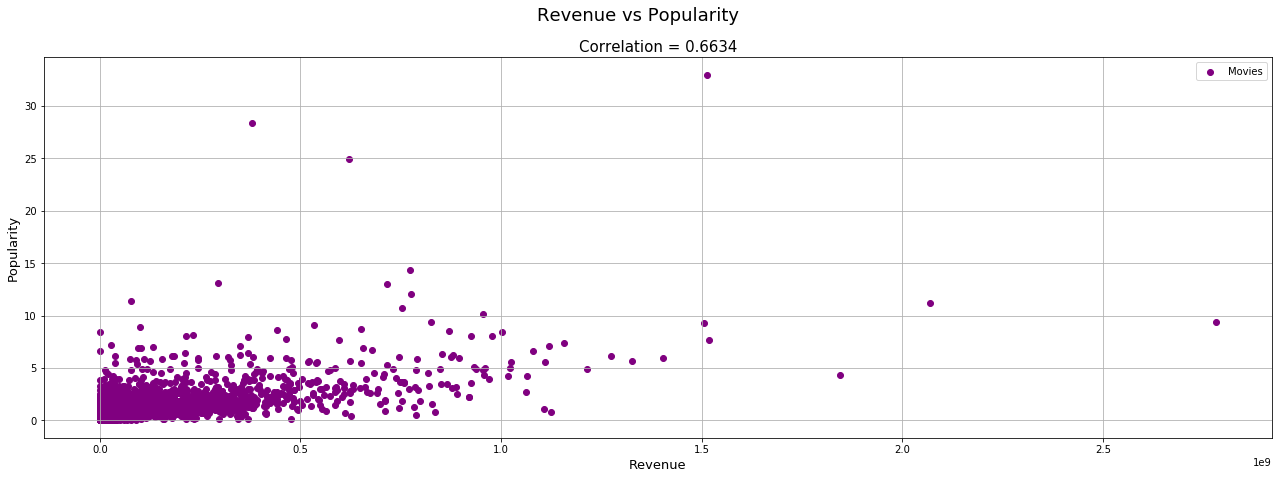

In [26]:
plt.figure(figsize=(22,7))
plt.scatter(df['revenue'], df['popularity'], color='purple', marker='o', label='Movies')

plt.suptitle('Revenue vs Popularity', fontsize=18)

plt.xlabel('Revenue', fontsize=13)
plt.ylabel('Popularity', fontsize=13)
plt.legend(loc='best')
plt.grid('True')

correlation = df['revenue'].corr(df['popularity'])
plt.title('Correlation = ' + "{:0.4f}".format(correlation), fontsize=15)


plt.show()

#### Budget

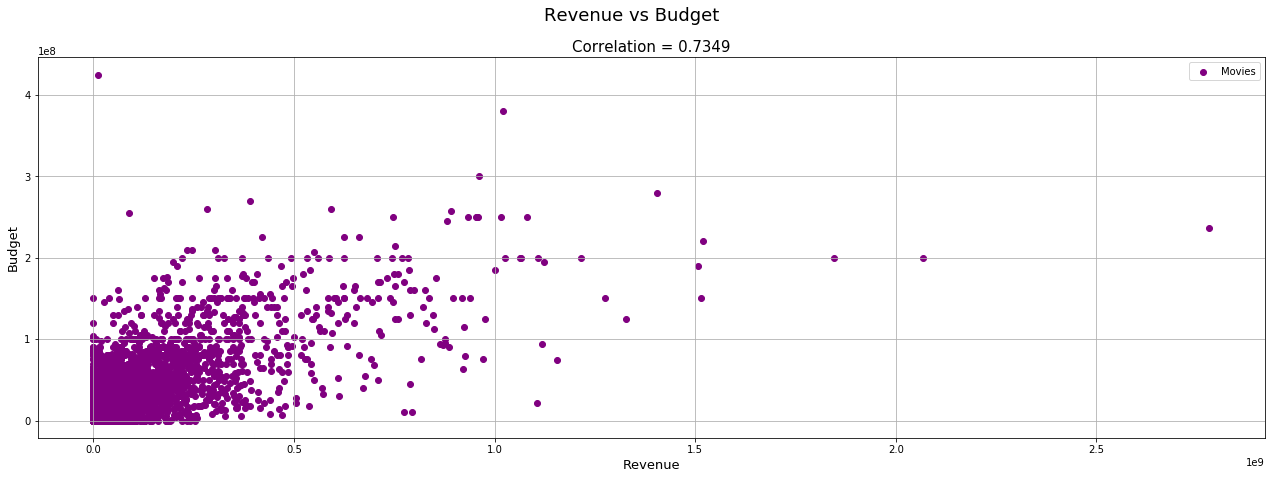

In [27]:
plt.figure(figsize=(22,7))
plt.scatter(df['revenue'], df['budget'], color='purple', marker='o', label='Movies')

plt.suptitle('Revenue vs Budget', fontsize=18)
plt.xlabel('Revenue', fontsize=13)
plt.ylabel('Budget', fontsize=13)
plt.legend(loc='best')
plt.grid('True')

correlation = df['revenue'].corr(df['budget'])
plt.title('Correlation = ' + "{:0.4f}".format(correlation), fontsize=15)

plt.show()

#### Vote Average

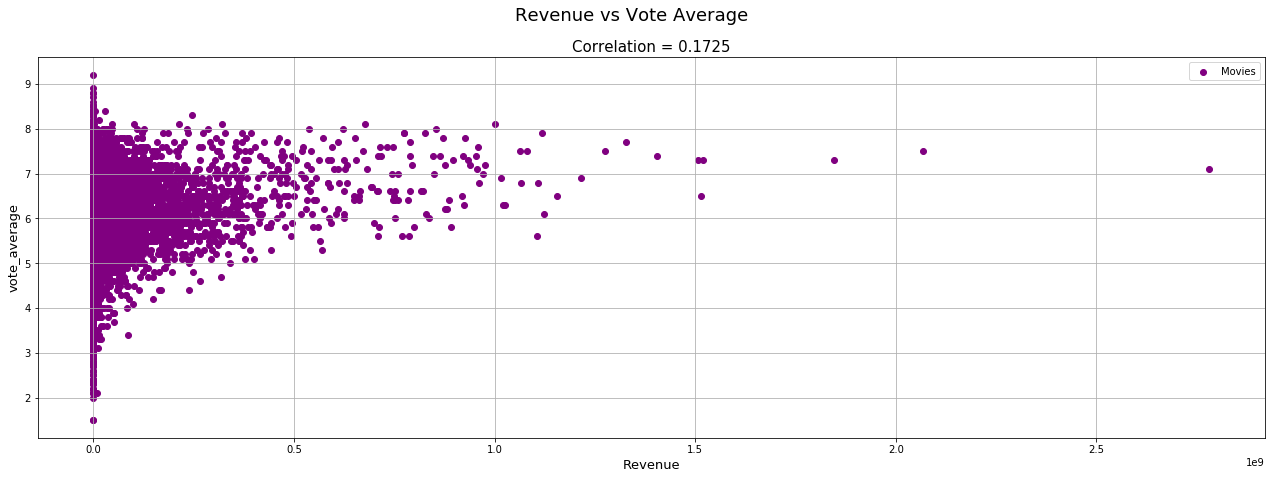

In [28]:
plt.figure(figsize=(22,7))
plt.scatter(df['revenue'], df['vote_average'], color='purple', marker='o', label='Movies')

plt.suptitle('Revenue vs Vote Average', fontsize=18)
plt.xlabel('Revenue', fontsize=13)
plt.ylabel('vote_average', fontsize=13)
plt.legend(loc='best')
plt.grid('True')

correlation = df['revenue'].corr(df['vote_average'])
plt.title('Correlation = ' + "{:0.4f}".format(correlation), fontsize=15)

plt.show()

### 2. Which genres are most popular from year to year?

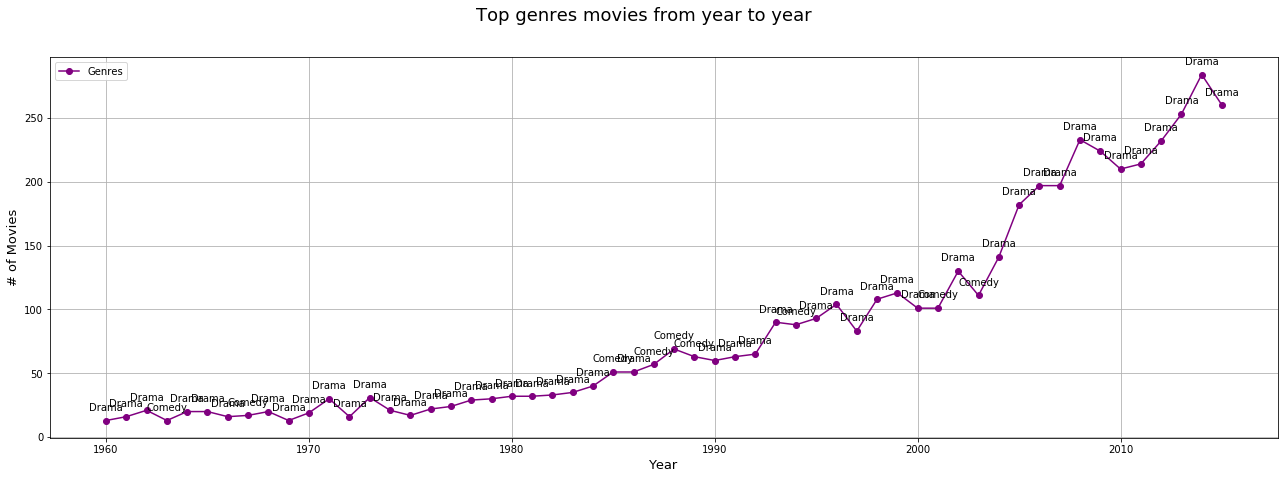

In [29]:
plt.figure(figsize=(22,7))
plt.plot(df_genres['release_year'], df_genres['# of movies'], color='purple', marker='o', label='Genres')

plt.suptitle('Top genres movies from year to year', fontsize=18)
plt.xlabel('Year', fontsize=13)
plt.ylabel('# of Movies', fontsize=13)
plt.legend(loc='best')
plt.grid('True')


for x,z,q in zip(df_genres['release_year'], df_genres['# of movies'], df_genres['genres']):

    label = "{:s}".format(q)

    plt.annotate(label, # this is the text
                 (x,z), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

plt.show()

### 3. Which length movies most liked by the audiences according to their popularity?

In [30]:
# Creating Group by to calculate Avg Popularity
df_popularity_runtime = df.groupby(['runtime_bucket','popularity']).popularity.mean().sort_values().groupby(level=0).tail(1).to_frame()
df_popularity_runtime.columns = ['Avg Popularity']
df_popularity_runtime.reset_index(level=[0,1],inplace=True)
df_popularity_runtime.sort_values(by='runtime_bucket',inplace=True)
df_popularity_runtime.drop(columns='popularity', inplace=True)
df_popularity_runtime.head()


,runtime_bucket,Avg Popularity
7,0-30,8.411577
2,31-60,0.980307
5,61-90,7.031452
9,91-120,28.419936
10,121-150,32.985763


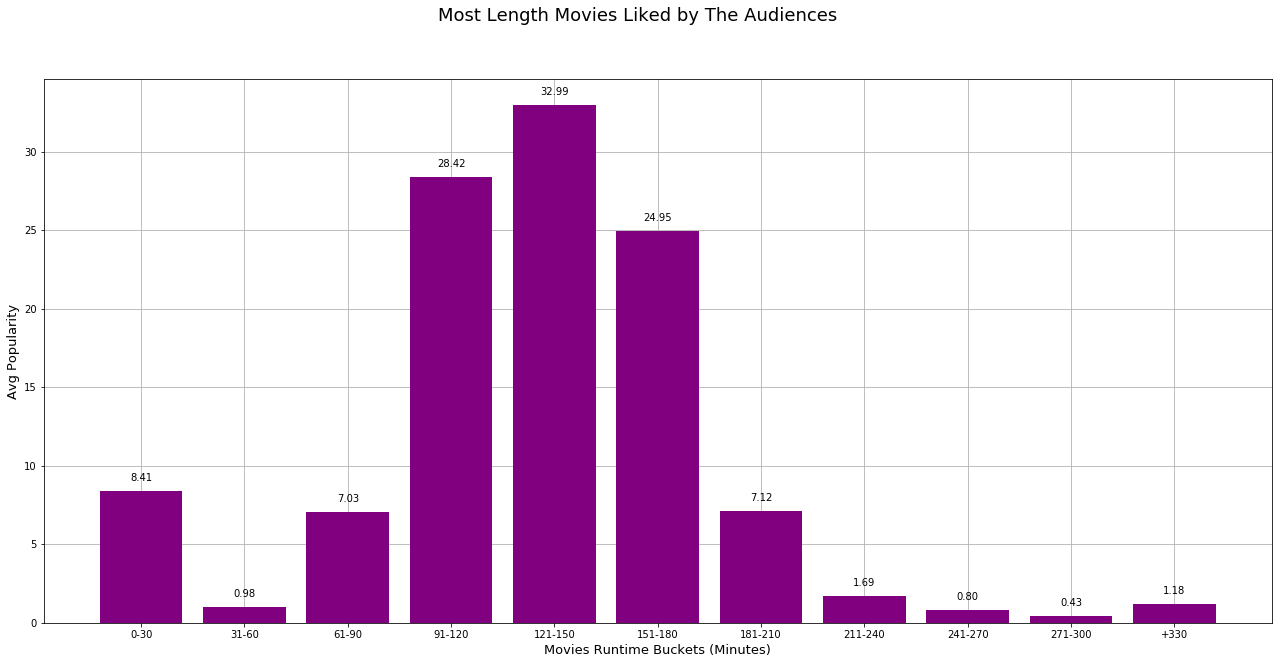

In [31]:
plt.figure(figsize=(22,10))



y_pos = np.arange(len(df_popularity_runtime['runtime_bucket']))

plt.bar(y_pos, df_popularity_runtime['Avg Popularity'], align='center', color='purple',zorder=3)
plt.xticks(y_pos, df_popularity_runtime['runtime_bucket'])

plt.suptitle('Most Length Movies Liked by The Audiences', fontsize=18)
plt.xlabel('Movies Runtime Buckets (Minutes)', fontsize=13)
plt.ylabel('Avg Popularity', fontsize=13)
plt.legend(loc='best')
plt.grid('True')

for x,y in zip ( y_pos, df_popularity_runtime['Avg Popularity']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

### 4. How many movies by year?

In [32]:
# Creating Group by to calculate Count of Movies
df_movies_year = df.groupby(['release_year']).release_year.count().sort_values().groupby(level=0).tail(1).to_frame()
df_movies_year.columns = ['# of movies']
df_movies_year.reset_index(level=[0],inplace=True)
df_movies_year.sort_values(by='release_year',inplace=True)


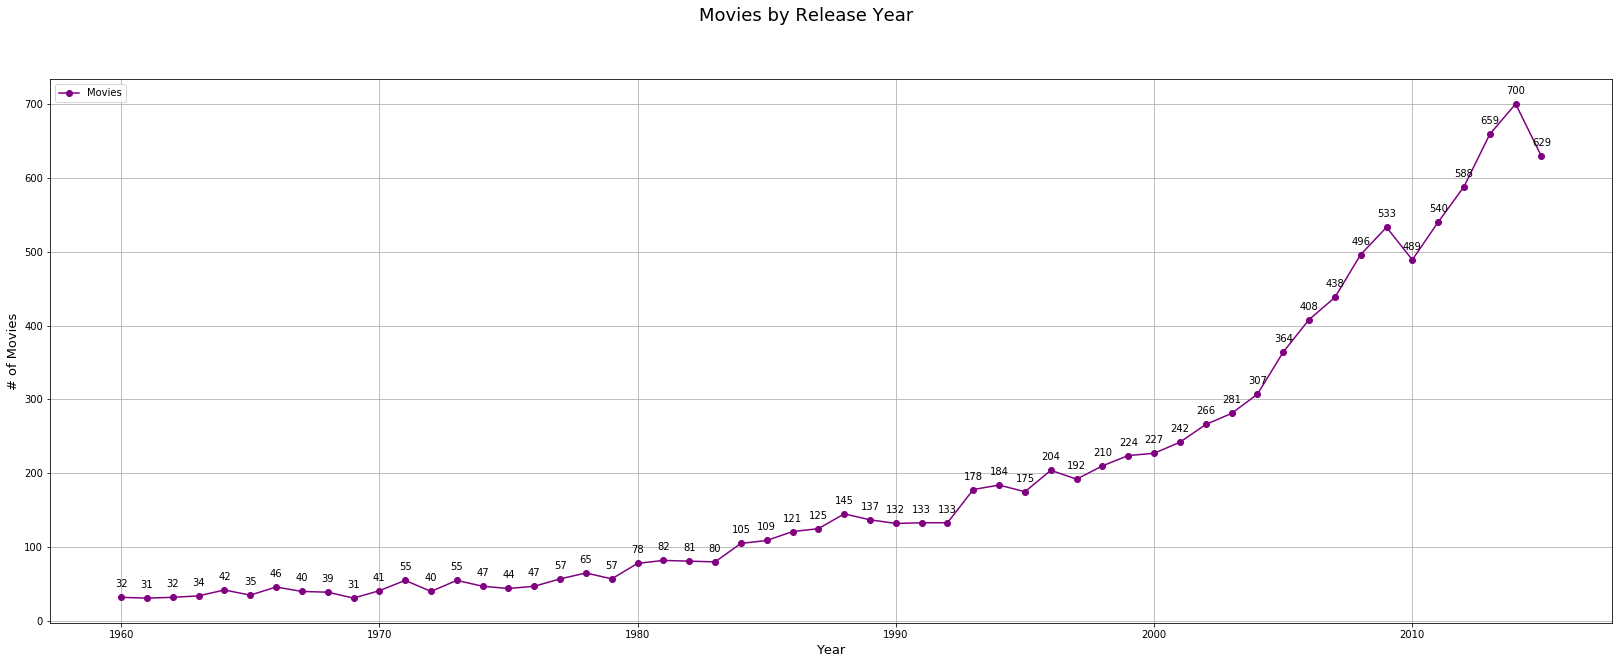

In [33]:
plt.figure(figsize=(28,10))
plt.plot(df_movies_year['release_year'], df_movies_year['# of movies'], color='purple', marker='o', label='Movies')

plt.suptitle('Movies by Release Year', fontsize=18)
plt.xlabel('Year', fontsize=13)
plt.ylabel('# of Movies', fontsize=13)
plt.legend(loc='best')
plt.grid('True')
plt.legend(loc=2)

for x,y in zip(df_movies_year['release_year'], df_movies_year['# of movies']):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

plt.show()

### 5. What are the top 5 rating movies?

In [34]:
# Sort by Popularity
top_five_movies = df.sort_values('popularity', ascending=False)

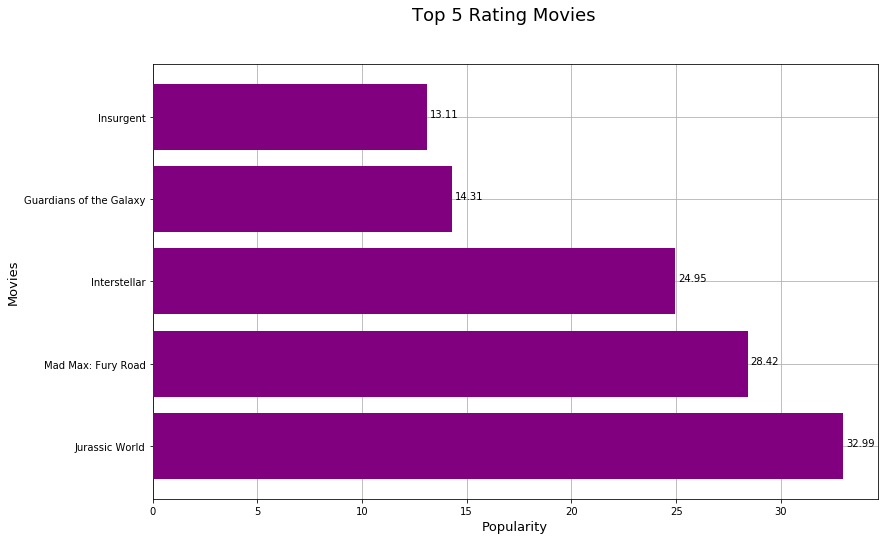

In [35]:
plt.figure(figsize=(13,8))

y_pos = np.arange(len(top_five_movies['original_title'][:5]))

plt.barh( y_pos,top_five_movies['popularity'][:5], align='center', color='purple',zorder=3)
plt.yticks( y_pos,top_five_movies['original_title'][:5])

plt.suptitle('Top 5 Rating Movies', fontsize=18)
plt.xlabel('Popularity', fontsize=13)
plt.ylabel('Movies', fontsize=13)
plt.legend(loc='best')
plt.grid('True')

for x,y in zip ( y_pos, top_five_movies['popularity'][:5]):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (y,x), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(17,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

### 6. Does the budjet of moives increased over time?

In [36]:
# Creating Group by to calculate Count of Movies
df_budget_year = df.groupby(['release_year','budget']).budget.sum().sort_values().groupby(level=0).tail(1).to_frame()
df_budget_year.columns = ['Total Budget']
df_budget_year.reset_index(level=[0,1],inplace=True)
df_budget_year.drop(columns='budget', inplace=True)
df_budget_year.sort_values(by='release_year',inplace=True)

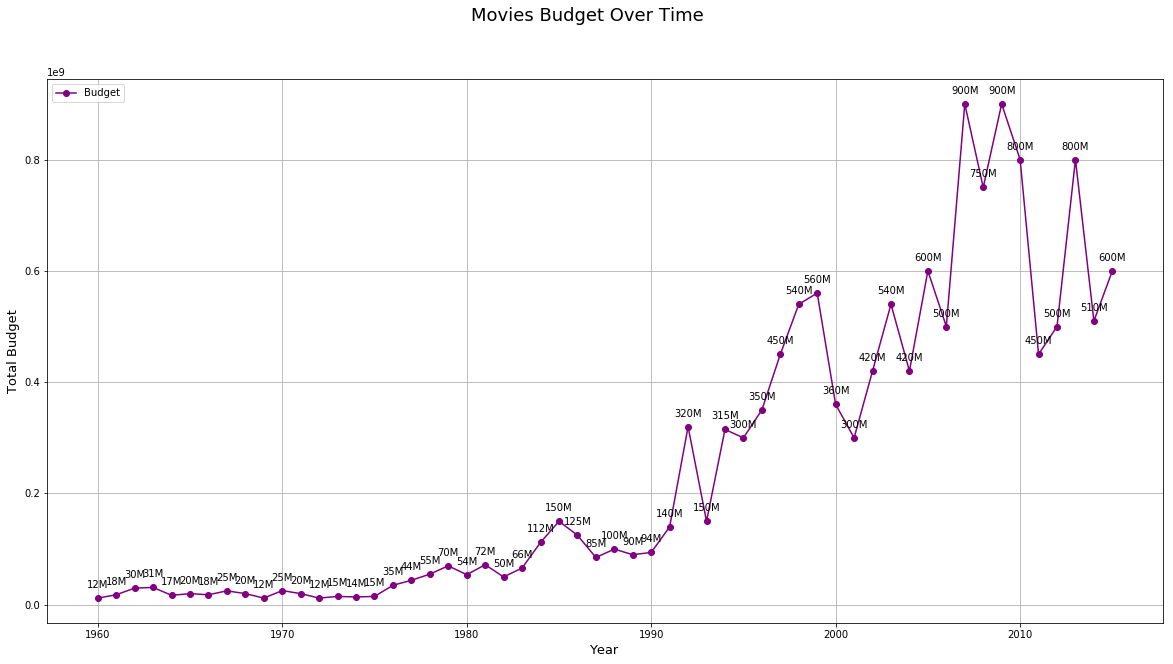

In [37]:
plt.figure(figsize=(20,10))
plt.plot(df_budget_year['release_year'], df_budget_year['Total Budget'], color='purple', marker='o', label='Budget')

plt.suptitle('Movies Budget Over Time', fontsize=18)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Total Budget', fontsize=13)
plt.legend(loc='best')
plt.grid('True')
plt.legend(loc=2)

for x,y in zip(df_budget_year['release_year'], df_budget_year['Total Budget']):

    label = str(int(int("{:.0f}".format(y))/1000000)) + "M"

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

plt.show()

### 7. What is the most profitable movie?

In [38]:
# Sorting Values
top_ten_profit = df_profit.sort_values('profit')
top_ten_profit.reset_index(inplace=True)

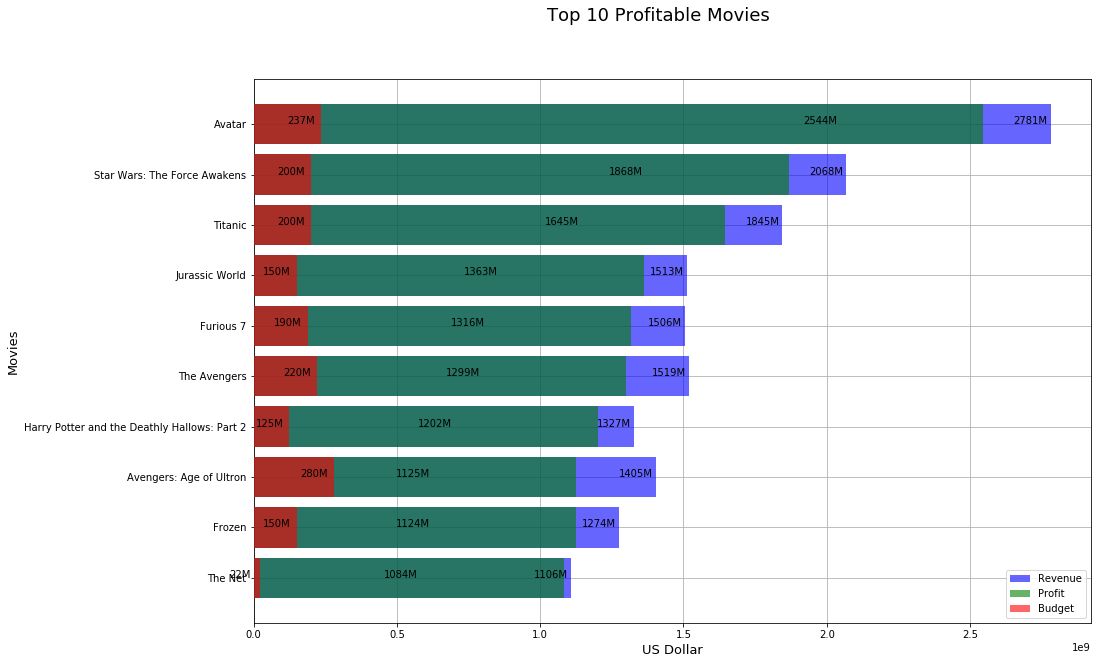

In [39]:
plt.figure(figsize=(15,10))

y_pos = np.arange(len(top_ten_profit['original_title'][-10:]))
plt.barh( y_pos,top_ten_profit['revenue'][-10:], align='center', color='blue',zorder=3, alpha=0.6, label='Revenue')
plt.barh( y_pos,top_ten_profit['profit'][-10:], align='center', color='green',zorder=3,alpha=0.6, label='Profit')
plt.barh( y_pos,top_ten_profit['budget'][-10:], align='center', color='red',zorder=3, alpha=0.6, label='Budget')



plt.yticks( y_pos,top_ten_profit['original_title'][-10:])

plt.suptitle('Top 10 Profitable Movies', fontsize=18)
plt.xlabel('US Dollar', fontsize=13)
plt.ylabel('Movies', fontsize=13)
plt.legend(loc='best')
plt.grid('True')

for x,y,z,q in zip ( y_pos, top_ten_profit['profit'][-10:],top_ten_profit['revenue'][-10:],top_ten_profit['budget'][-10:]):

    label = str(int(int("{:.0f}".format(y))/1000000)) + "M"
    label_z = str(int(int("{:.0f}".format(z))/1000000)) + "M"
    label_q = str(int(int("{:.0f}".format(q))/1000000)) + "M"



    plt.annotate(label, # this is the text
                 (y,x), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-180,0), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center
    
    plt.annotate(label_z, # this is the text
                 (z,x), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-20,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
        
    plt.annotate(label_q, # this is the text
                 (q,x), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-20,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

#### 7.1 More Detialed Report

In [40]:
top_ten_profit[['original_title','release_year','production_companies','director','revenue','budget','profit']][-10:].head().style.hide_index()

original_title,release_year,production_companies,director,revenue,budget,profit
The Net,1995,Columbia Pictures,Irwin Winkler,1106279658,22000000,1084279658
Frozen,2013,Walt Disney Pictures|Walt Disney Animation Studios,Chris Buck|Jennifer Lee,1274219009,150000000,1124219009
Avengers: Age of Ultron,2015,Marvel Studios|Prime Focus|Revolution Sun Studios,Joss Whedon,1405035767,280000000,1125035767
Harry Potter and the Deathly Hallows: Part 2,2011,Warner Bros.|Heyday Films|Moving Picture Company (MPC),David Yates,1327817822,125000000,1202817822
The Avengers,2012,Marvel Studios,Joss Whedon,1519557910,220000000,1299557910


### 8. What are the top 20 production companies with higher number of release?

In [41]:
# Grouping by and Sorting Values

df_prodcomp = df_prodcomp.groupby(['production_companies']).production_companies.count().sort_values().groupby(level=0).tail(1).to_frame()
df_prodcomp.columns = ['Total Movies']
df_prodcomp.reset_index(level=[0],inplace=True)
df_prodcomp.sort_values(by='Total Movies',inplace=True)

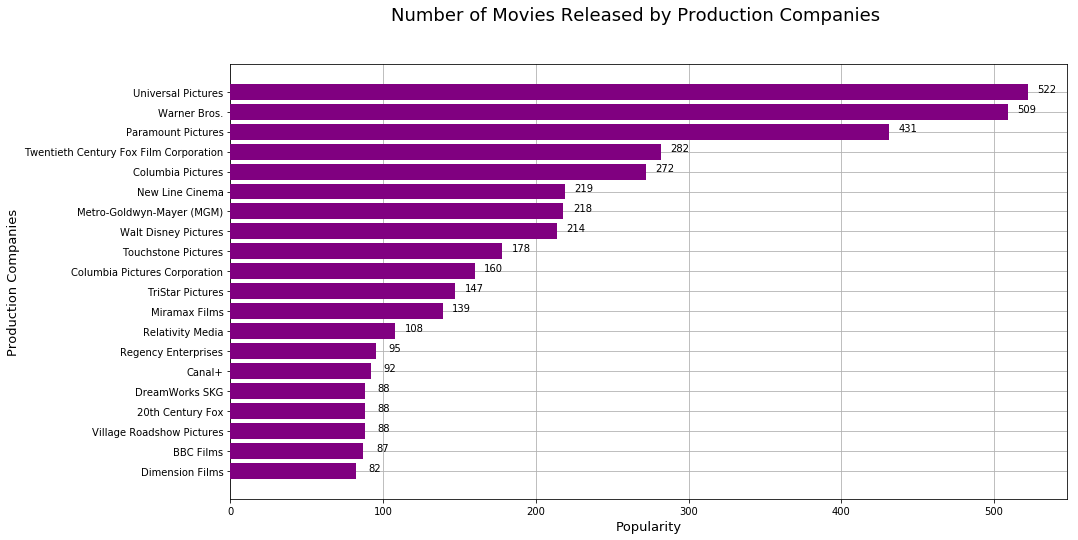

In [42]:
plt.figure(figsize=(15,8))

y_pos = np.arange(len(df_prodcomp['production_companies'][-20:]))

plt.barh( y_pos,df_prodcomp['Total Movies'][-20:], align='center', color='purple',zorder=3)
plt.yticks( y_pos,df_prodcomp['production_companies'][-20:])

plt.suptitle('Number of Movies Released by Production Companies', fontsize=18)
plt.xlabel('Popularity', fontsize=13)
plt.ylabel('Production Companies', fontsize=13)
plt.legend(loc='best')
plt.grid('True')

for x,y in zip ( y_pos, df_prodcomp['Total Movies'][-20:]):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (y,x), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(19,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

<a id='conclusions'></a>
## Conclusions

We will go over the conclusions based on our research questions that we have went through.
> **Q1**: One of the properties that have a strong association with high-revenue movies is Budget. A correlation of **0.73** indicates a strong, positive association between them. On the other hand, Votes showed a weak association with revenues with a correlation of **0.17**.


> **Q2**: Drama movies has been the most genres released since 2003.



> **Q3**: The most popular movies length for audiences is around 120 to 150 minutes.


> **Q4**: Number of movies released every year is witnessing an increase over time. In the 2000s we have seen the highest slope in producing movies.


> **Q5**: Jurassic World, Max Max: Fury Road, Interstellar, Guardians of the Galaxy and Insurgent are the most 5 popular movies.


> **Q6**: There are an overall increase of the budget over time, but the highest amount of money spent on creating movies was in the year **2009** and **2007** by **900 million Dollers**.


> **Q7**: Avatar, Star Wars: The Force Awakens and Titanic are the most profitable movies.


> **Q8**: Universal Pictures, Warner Bros and Paramount Pictures production companies have the most relaesed movies.


**Limitations**

During the analysis, we decided to drop some of the columns that we are were not going to use. To be able to have an accurate profit column, we had to drop any row that contains 0 in the budget or revenue. Any duplicated values have been removed from the dataset.


In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0